  # Timeflux prediction
 Read the outut of timeflux replay 

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 
from pyriemann.utils.viz import plot_confusion_matrix
import seaborn as sns
import json

In [2]:
events = pd.read_csv('../data/out/predictions_3.csv', index_col=0).reset_index()
test_events = events.iloc[events[events.label == 'train_stops'].index[0] + 1:]
ytest = test_events.data.apply(lambda s: json.loads(s).get('target')).dropna()
ypred = test_events.data.apply(lambda s: json.loads(s).get('result')).dropna() 

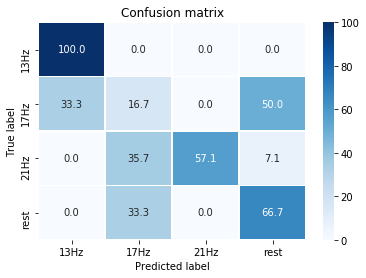

In [3]:
plot_confusion_matrix(ypred.values, ytest.values, set(ypred)); 